# **Task 1: Loading and Preprocessing Data**

In [52]:
import pandas as pd # for data manuplation and analysis
import numpy as np #work with the numerical values as it makes it easy to apply mathematical functions
from sklearn import datasets #To have Iris dataset to be used in the task
from sklearn import model_selection #split the training and vaildation dataset
from sklearn import tree #To get decision tree 
import matplotlib.pyplot as plt #To help plot the graph, figure and allows changes in the figure
%matplotlib inline 
#inline is done so makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window
import graphviz #To construct decision tree, showing the nodes and edges
from sklearn.model_selection import train_test_split

* Load the Iris dataset from scikit-learn library. 

In [53]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [54]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x]) # Each value from 'target' is used as index to get corresponding value from 'target_names' 

print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
55,5.7,2.8,4.5,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor
32,5.2,4.1,1.5,0.1,0,setosa
136,6.3,3.4,5.6,2.4,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   flower_species     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Split the dataset into features and labels. <br>
*	Use only two features for modeling i.e. petal length and petal width. 

In [56]:
#Lets create feature matrix X  and y labels
X = df[['petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 2)
y shape= (150, 1)


In [57]:
# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# **Task 2: Implementing KNN Algorithm**

*	Implement the KNN algorithm using the scikit-learn library.

Using an example for kNN where k=15

In [58]:
from sklearn.neighbors import KNeighborsClassifier #importing KNN Classifier from scikit learn

knn = KNeighborsClassifier(n_neighbors=15) #using an example k=15
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [59]:
from sklearn import metrics
y_pred = knn.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred) #calculating the accuracy score 
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9666666666666667


*	Vary the value of k from 1 to 10 and calculate the accuracy of the model using k-fold cross-validation, set k as 5.

Using Cross-Validation using cv = 5 (5 folds)

In [60]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,11)] #creating a list for 10 different values of k
scores = [] #creating an list that would have calculated scores for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score)) #appending calculated scores

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

* Show scatter plot of petal length Vs petal width against each k value.

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


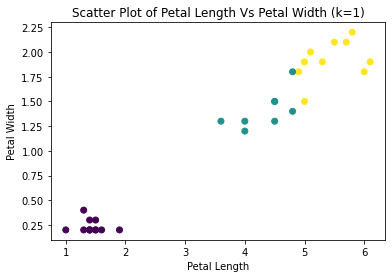

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


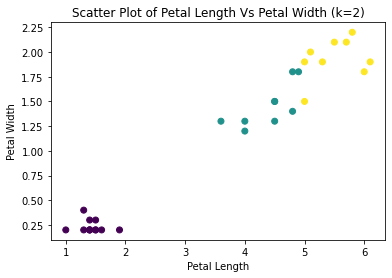

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


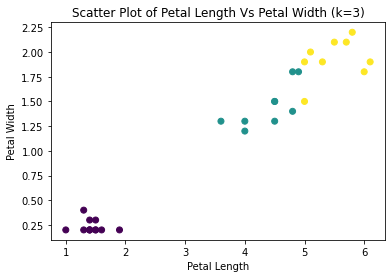

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


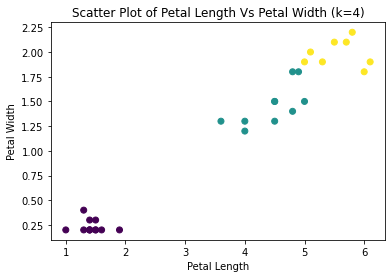

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


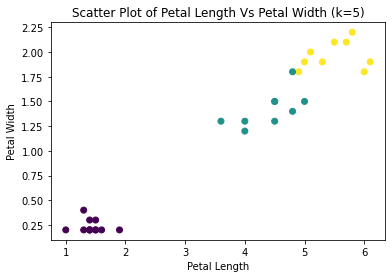

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


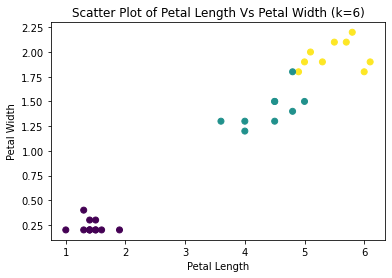

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


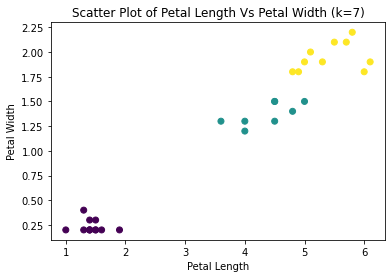

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


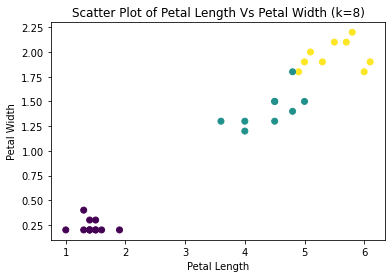

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


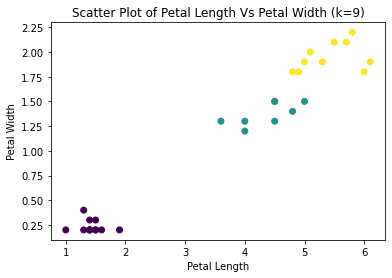

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


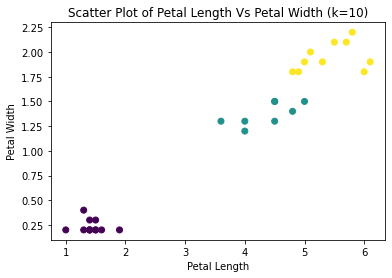

In [76]:
#creating scatter plot with variation of k
import matplotlib.pyplot as plt
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    plt.scatter(X_val['petal length (cm)'], X_val['petal width (cm)'], c=y_pred, cmap='viridis')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(f'Scatter Plot of Petal Length Vs Petal Width (k={k})')
    plt.show()

*	Plot a graph of accuracy against each k value.

Text(0, 0.5, 'Accuracy Score')

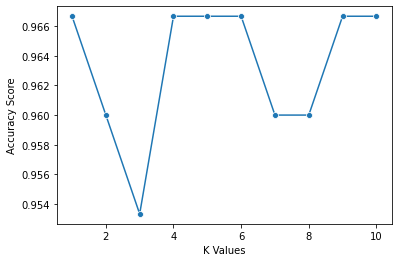

In [61]:
#plotting the graph of k values and accuracy scores
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Find the optimum value of k from graph

In [62]:
#finding the maximum value from score and its corresponding k value 
best_index = np.argmax(scores)
best_k = k_values[best_index]

print("Best value of K found: ", best_k)

Best value of K found:  4


We can now train our model using the best k value (k=4) <br>


* Observe the effect of model accuracy on the train-test size variation.  




In [69]:
test_sizes=[0.1,0.2,0.3,0.4] #creatig array for different test sample sizes
for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    print(f'Train size: {size:.1f} Test Accuracy: {knn.score(X_test, y_test):.2f}')

Train size: 0.1 Test Accuracy: 0.87
Train size: 0.2 Test Accuracy: 0.93
Train size: 0.3 Test Accuracy: 0.96
Train size: 0.4 Test Accuracy: 0.95


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

* Implement the elbow method to select the optimal value of k.
*	Plot the objective function (error) against different values of k.
* Identify the optimal value of k based on the elbow method.


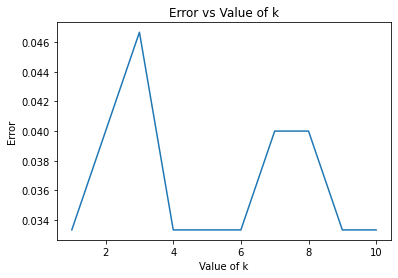

In [71]:
error = [1 - accuracy_scores for accuracy_scores in scores] #creating error array from scores array
plt.plot(k_values, error)
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.title('Error vs Value of k')
plt.show()

From the objective function plot shown above, it shows that k=4 is the optimum value since lowest error is observed at that.